In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import (confusion_matrix,
                             classification_report)

from feature_extractor import fingerprint_features

## Data Exploration

In [2]:
df = pd.read_csv('data/dataset_single.csv')
df.head()

,P1,mol_id,smiles
0,1,CID2999678,Cc1cccc(N2CCN(C(=O)C34CC5CC(CC(C5)C3)C4)CC2)c1C
1,0,CID2999679,Cn1ccnc1SCC(=O)Nc1ccc(Oc2ccccc2)cc1
2,1,CID2999672,COc1cc2c(cc1NC(=O)CN1C(=O)NC3(CCc4ccccc43)C1=O...
3,0,CID5390002,O=C1/C(=C/NC2CCS(=O)(=O)C2)c2ccccc2C(=O)N1c1cc...
4,1,CID2999670,NC(=O)NC(Cc1ccccc1)C(=O)O


In [3]:
df['seq_char_count']= df['smiles'].apply(lambda x: len(x))

max length of smiles: 74
min length of smiles: 14


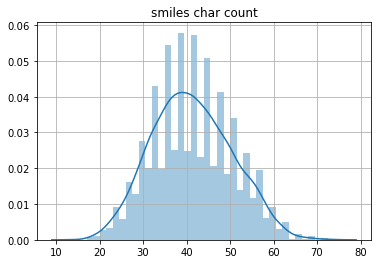

In [4]:
print(f"max length of smiles: {np.max(df['seq_char_count'].values)}")
print(f"min length of smiles: {np.min(df['seq_char_count'].values)}")

sns.distplot(df['seq_char_count'].values)
plt.title('smiles char count')
plt.grid(True)

In [5]:
# Check the class label imbalance

neg, pos = np.bincount(df['P1'])
total = neg + pos
print(f"Class Lebels\n    Total: {total}\n    Positive: "
      f"{pos} ({(100 * pos / total):.2f}% of total)\n")

Class Lebels
    Total: 4999
    Positive: 4108 (82.18% of total)



In [6]:
# check if can use mol_id feature for classification
print(f"number of unique mol_id: {len(df.mol_id.unique())}")

number of unique mol_id: 4999


In [7]:
# features
X = df['smiles'].values

# labels
y = df['P1'].values

### Preprocessing for Model1

Model1 takes the extracted features of a molecule as input and predict the P1 property.

In [8]:
extracted_features = np.array([fingerprint_features(smile, size=2048) 
                               for smile in X])
print(f"shape of extracted_features: {extracted_features.shape}")
print(f"samples of extracted features:\n{extracted_features[:5]}")

shape of extracted_features: (4999, 2048)
samples of extracted features:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 1 0 ... 0 0 0]]


In [9]:
# split data to train and test
# we use the functionality of keras models for validation data

X_train, X_test, y_train, y_test = train_test_split(
    extracted_features, y, test_size=0.2, random_state=42, stratify=y)